In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from collections import defaultdict

In [115]:
df1 = pd.read_csv('./Dataset/symptoms_final_dataset.csv')

In [116]:
df1.head()

,code,name,symptoms,description,test_procedure,medication_desc,medications,symptom_desc,risk_years,less_risk_years,high_risk_race_ethnicity,high_risk_gender,less_risk_race_ethnicity,less_risk_gender
0,105,Panic disorder,"{'Anxiety and nervousness': '88', 'Depression'...",Panic disorder is an anxiety disorder charact...,"['Psychotherapy', 'Mental health counseling', ...",The most commonly prescribed drugs for patient...,"['Lorazepam', 'Alprazolam (Xanax)', 'Clonazepa...",Within all the people who go to their doctor w...,['30-44'],"['1-4', '< 1']",['NA'],['NA'],['NA'],['NA']
1,106,Vocal cord polyp,"{'Hoarse voice': '91', 'Sore throat': '47', 'D...",Vocal cord polyp is encountered rarely on Sym...,"['Tracheoscopy and laryngoscopy with biopsy', ...",The most commonly prescribed drugs for patient...,"['Esomeprazole (Nexium)', 'Beclomethasone Nasa...",Within all the people who go to their doctor w...,"['60-74', '45-59']",['NA'],['NA'],['NA'],['NA'],['NA']
2,107,Turner syndrome,"{'Groin mass': '27', 'Leg pain': '27', 'Hip pa...","Also known as Gonadal Dysgenesis, XO Syndrome...","['Complete physical skin exam performed (ML)',...",The most commonly prescribed drugs for patient...,"['Somatropin', 'Sulfamethoxazole (Bactrim)', '...",Within all the people who go to their doctor w...,"['5-14', '1-4']","['75+', '60-74']",['other'],['female'],['NA'],['NA']
3,108,Cryptorchidism,"{'Symptoms of the scrotum and testes': '50', '...","Also known as Undescended Testes, Cryptorchis...","['Complete physical skin exam performed (ML)',...",The most commonly prescribed drugs for patient...,"['Haemophilus B Conjugate Vaccine (Obsolete)',...",Within all the people who go to their doctor w...,"['5-14', '1-4', '< 1']","['75+', '60-74']","['other', 'hispanic']",['male'],['NA'],['female']
4,109,Poisoning due to ethylene glycol,"{'Abusing alcohol': '78', 'Fainting': '64', 'H...",Also known as Anti Freeze Poisoning and Ethyl...,"['Intravenous fluid replacement', 'Hematologic...",The most commonly prescribed drugs for patient...,"['Lorazepam', 'Thiamine', 'Naloxone (Suboxone)...",Within all the people who go to their doctor w...,"['15-29', '45-59']","['75+', '5-14', '1-4']",['NA'],['NA'],['other'],['NA']


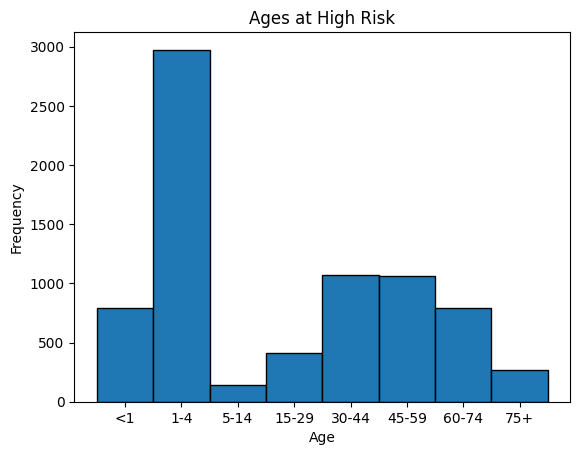

In [117]:
filtered_risk_years = [age for age_range in df1['risk_years'] if age_range != 'NA' for age in age_range]
filtered_risk_years += ['<1']
ordered_age_ranges = ['<1', '1-4', '5-14', '15-29', '30-44', '45-59', '60-74', '75+']
plt.hist(filtered_risk_years, bins=np.arange(len(ordered_age_ranges) + 1) - 0.5, edgecolor='black', align='left')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Ages at High Risk')
plt.xticks(np.arange(len(ordered_age_ranges)) - 0.5, ordered_age_ranges)
plt.show()

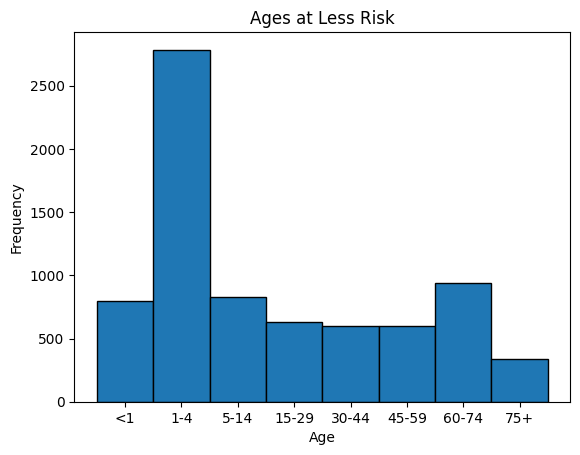

In [118]:
filtered_risk_years = [age for age_range in df1['less_risk_years'] if age_range != 'NA' for age in age_range]
filtered_risk_years += ['<1']
ordered_age_ranges = ['<1', '1-4', '5-14', '15-29', '30-44', '45-59', '60-74', '75+']
plt.hist(filtered_risk_years, bins=np.arange(len(ordered_age_ranges) + 1) - 0.5, edgecolor='black', align='left')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Ages at Less Risk')
plt.xticks(np.arange(len(ordered_age_ranges)) - 0.5, ordered_age_ranges)
plt.show()

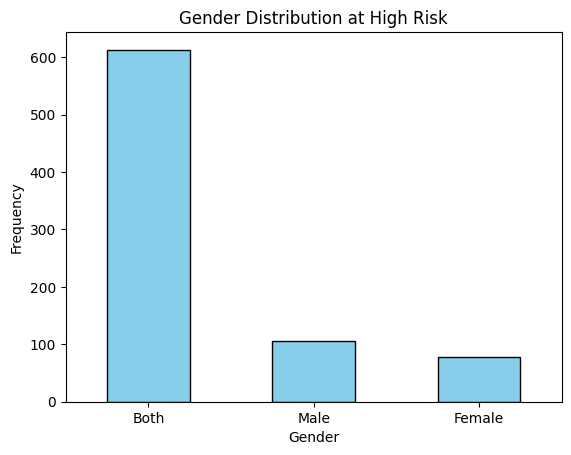

In [119]:
# Pie Chart
gender_counts = df1['high_risk_gender'].value_counts()
ax = gender_counts.plot(kind='bar', edgecolor='black', color='skyblue')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.title('Gender Distribution at High Risk')
plt.xticks(rotation=0)
ax.set_xticklabels(['Both', 'Male', 'Female'])
plt.show()

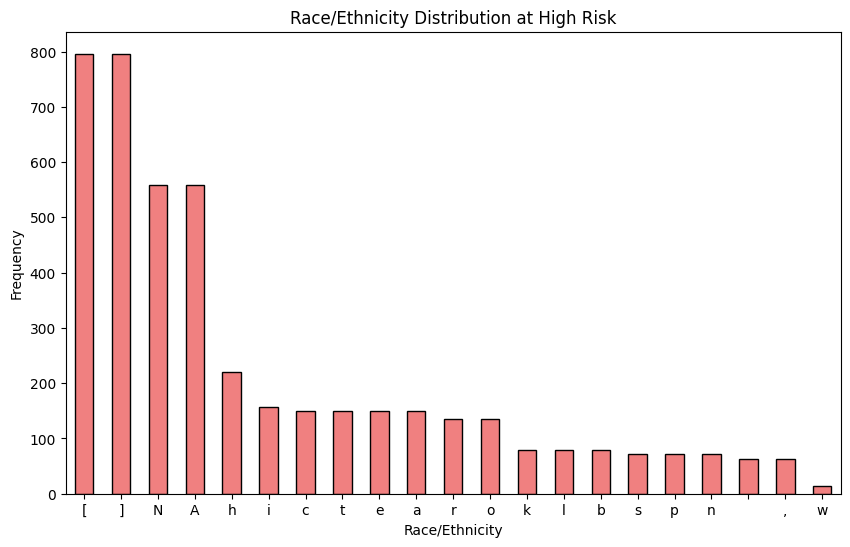

In [120]:
# Stacked Bar Chart
filtered_high_risk_race = [race for race_list in df1['high_risk_race_ethnicity'] if race_list != '[NA]' for race in race_list]
race_counts = pd.Series(filtered_high_risk_race).value_counts()
race_counts = race_counts.iloc[1:]
plt.figure(figsize=(10, 6))
ax = race_counts.plot(kind='bar', edgecolor='black', color='lightcoral')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Frequency')
plt.title('Race/Ethnicity Distribution at High Risk')
plt.xticks(rotation=0)
plt.show()

In [121]:
df1.head()

,code,name,symptoms,description,test_procedure,medication_desc,medications,symptom_desc,risk_years,less_risk_years,high_risk_race_ethnicity,high_risk_gender,less_risk_race_ethnicity,less_risk_gender
0,105,Panic disorder,"{'Anxiety and nervousness': '88', 'Depression'...",Panic disorder is an anxiety disorder charact...,"['Psychotherapy', 'Mental health counseling', ...",The most commonly prescribed drugs for patient...,"['Lorazepam', 'Alprazolam (Xanax)', 'Clonazepa...",Within all the people who go to their doctor w...,['30-44'],"['1-4', '< 1']",['NA'],['NA'],['NA'],['NA']
1,106,Vocal cord polyp,"{'Hoarse voice': '91', 'Sore throat': '47', 'D...",Vocal cord polyp is encountered rarely on Sym...,"['Tracheoscopy and laryngoscopy with biopsy', ...",The most commonly prescribed drugs for patient...,"['Esomeprazole (Nexium)', 'Beclomethasone Nasa...",Within all the people who go to their doctor w...,"['60-74', '45-59']",['NA'],['NA'],['NA'],['NA'],['NA']
2,107,Turner syndrome,"{'Groin mass': '27', 'Leg pain': '27', 'Hip pa...","Also known as Gonadal Dysgenesis, XO Syndrome...","['Complete physical skin exam performed (ML)',...",The most commonly prescribed drugs for patient...,"['Somatropin', 'Sulfamethoxazole (Bactrim)', '...",Within all the people who go to their doctor w...,"['5-14', '1-4']","['75+', '60-74']",['other'],['female'],['NA'],['NA']
3,108,Cryptorchidism,"{'Symptoms of the scrotum and testes': '50', '...","Also known as Undescended Testes, Cryptorchis...","['Complete physical skin exam performed (ML)',...",The most commonly prescribed drugs for patient...,"['Haemophilus B Conjugate Vaccine (Obsolete)',...",Within all the people who go to their doctor w...,"['5-14', '1-4', '< 1']","['75+', '60-74']","['other', 'hispanic']",['male'],['NA'],['female']
4,109,Poisoning due to ethylene glycol,"{'Abusing alcohol': '78', 'Fainting': '64', 'H...",Also known as Anti Freeze Poisoning and Ethyl...,"['Intravenous fluid replacement', 'Hematologic...",The most commonly prescribed drugs for patient...,"['Lorazepam', 'Thiamine', 'Naloxone (Suboxone)...",Within all the people who go to their doctor w...,"['15-29', '45-59']","['75+', '5-14', '1-4']",['NA'],['NA'],['other'],['NA']


In [122]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   code                      796 non-null    int64 
 1   name                      796 non-null    object
 2   symptoms                  796 non-null    object
 3   description               796 non-null    object
 4   test_procedure            796 non-null    object
 5   medication_desc           796 non-null    object
 6   medications               796 non-null    object
 7   symptom_desc              796 non-null    object
 8   risk_years                796 non-null    object
 9   less_risk_years           796 non-null    object
 10  high_risk_race_ethnicity  796 non-null    object
 11  high_risk_gender          796 non-null    object
 12  less_risk_race_ethnicity  796 non-null    object
 13  less_risk_gender          796 non-null    object
dtypes: int64(1), object(13)
me

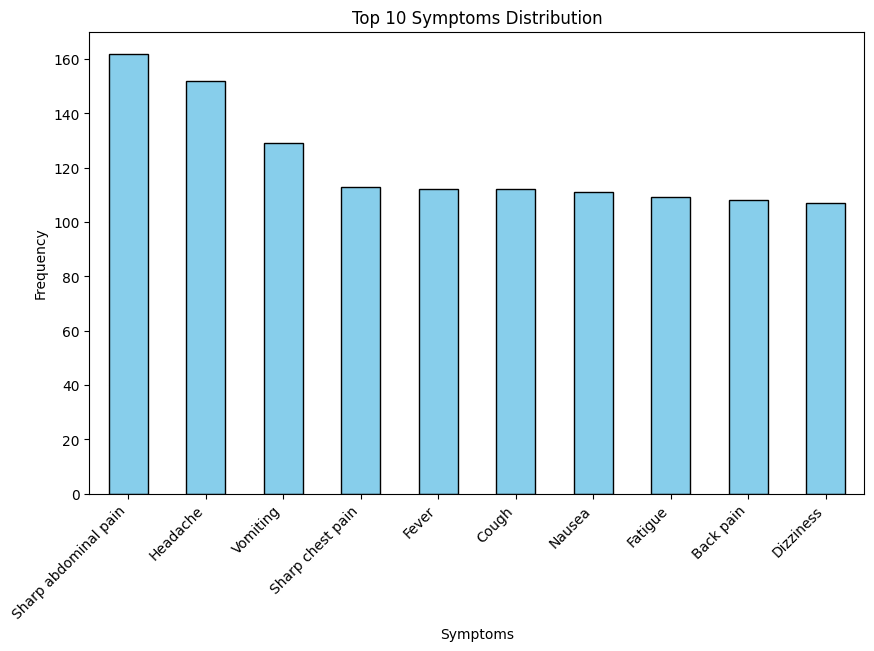

In [123]:
import ast

symptom_names = [symptom for symptoms_dict in df1['symptoms'] if isinstance(symptoms_dict, str) for symptom in ast.literal_eval(symptoms_dict).keys()]
if symptom_names:
    symptom_counts = pd.Series(symptom_names).value_counts().sort_values(ascending=False)
    top_10_symptoms = symptom_counts.head(10)

    plt.figure(figsize=(10, 6))
    top_10_symptoms.plot(kind='bar', edgecolor='black', color='skyblue')
    plt.xlabel('Symptoms')
    plt.ylabel('Frequency')
    plt.title('Top 10 Symptoms Distribution')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("No valid symptom names found.")


# daily_final.csv

In [124]:
dailyFinal = pd.read_csv('./Dataset/Diseases/Daily/daily_final.csv')
dailyFinal = dailyFinal.drop(columns=['Unnamed: 0'])

In [125]:
dailyFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29178 entries, 0 to 29177
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        29178 non-null  object 
 1   Code                          29178 non-null  object 
 2   Date                          29178 non-null  object 
 3   Cases                         17133 non-null  float64
 4   Deaths                        13121 non-null  float64
 5   Disease                       29178 non-null  object 
 6   Average Temperature (C)       29178 non-null  float64
 7   Average Temperature (F)       29178 non-null  object 
 8   Most Repeated Weather Phrase  29178 non-null  object 
 9   Average Wind Speed (mph)      29178 non-null  float64
 10  Average Wind Speed (kph)      29178 non-null  float64
 11  Average Wind Degree           29178 non-null  object 
 12  Most Repeated Wind Direction  29178 non-null  object 
 13  A

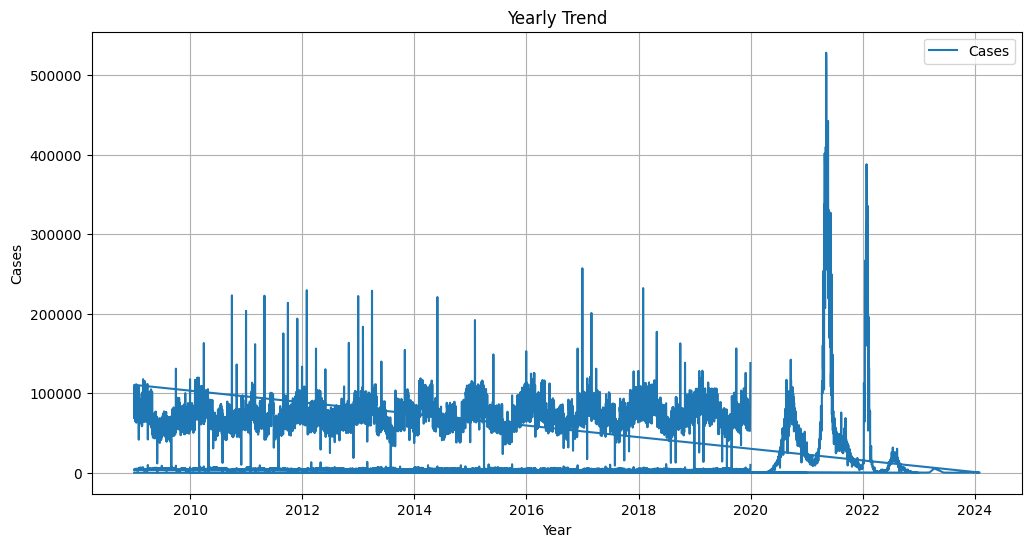

In [126]:
dailyFinal['Date'] = pd.to_datetime(dailyFinal['Date'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dailyFinal['Date'], dailyFinal["Cases"], label="Cases")

# Customize plot
plt.title('Yearly Trend')
plt.xlabel('Year')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_12876\1672986897.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = dailyFinal.resample('M', on='Date').sum()


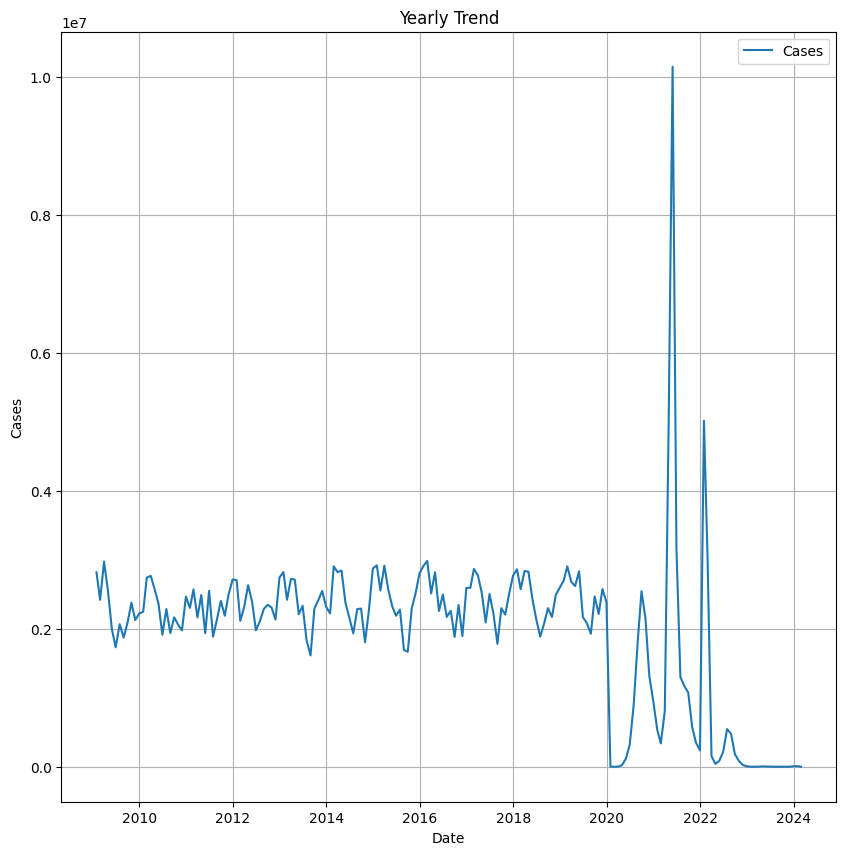

In [127]:
# Resample the data by year and calculate the sum of cases for each month
yearly_data = dailyFinal.resample('M', on='Date').sum()
plt.figure(figsize=(10, 10))
plt.plot(yearly_data.index, yearly_data["Cases"], label="Cases", linestyle='-')
plt.title('Yearly Trend')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.show()

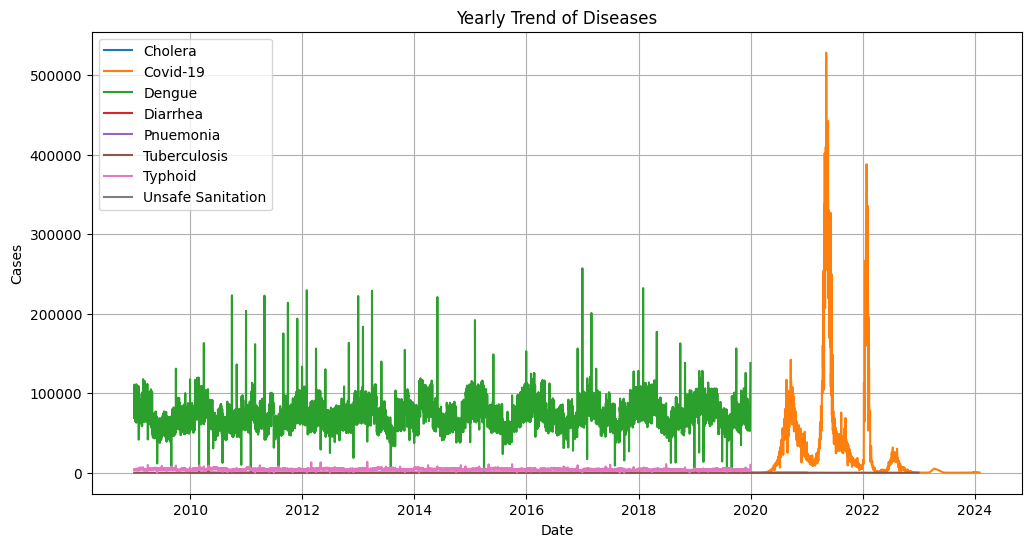

In [128]:
diseases = dailyFinal['Disease'].unique()
plt.figure(figsize=(12, 6))

for disease in diseases:
    disease_data = dailyFinal[dailyFinal['Disease'] == disease]
    plt.plot(disease_data['Date'], disease_data['Cases'], label=disease)

plt.title('Yearly Trend of Diseases')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_12876\3969005615.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = dailyFinal.groupby([dailyFinal['Disease'], dailyFinal['Date'].dt.month]).sum().reset_index()


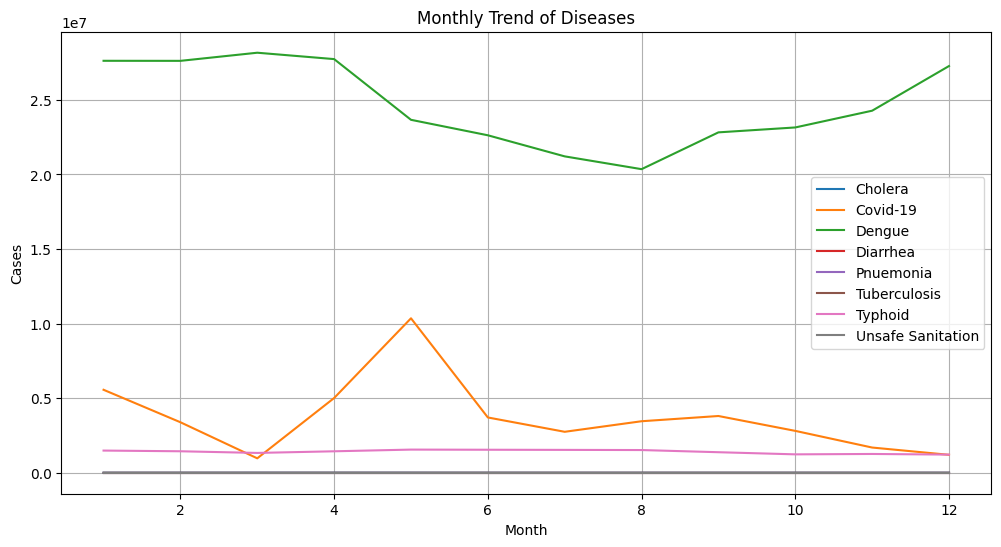

In [129]:
# Assuming 'Date' column contains datetime objects
# If not, convert it to datetime using pd.to_datetime()
dailyFinal['Date'] = pd.to_datetime(dailyFinal['Date'])

# Group data by disease and month, summing up cases monthly
monthly_data = dailyFinal.groupby([dailyFinal['Disease'], dailyFinal['Date'].dt.month]).sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

for disease in monthly_data['Disease'].unique():
    disease_data = monthly_data[monthly_data['Disease'] == disease]
    plt.plot(disease_data['Date'], disease_data['Cases'], label=disease)

plt.title('Monthly Trend of Diseases')
plt.xlabel('Month')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_12876\1333222605.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  weekly_data = dailyFinal.groupby([dailyFinal['Disease'], dailyFinal['Date'].dt.week]).sum().reset_index()
C:\Users\Admin\AppData\Local\Temp\ipykernel_12876\1333222605.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly_data = dailyFinal.groupby([dailyFinal['Disease'], dailyFinal['Date'].dt.week]).sum().reset_index()


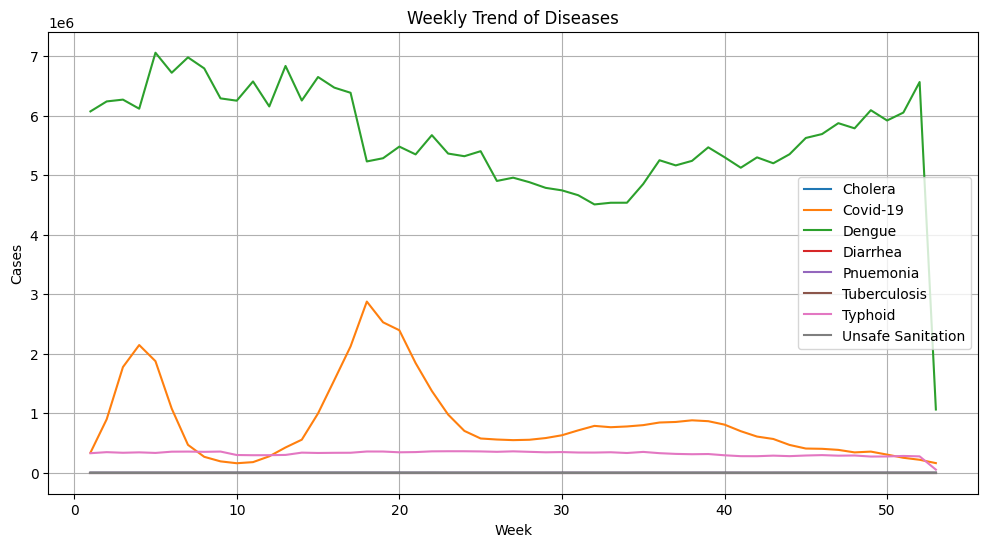

In [130]:
dailyFinal['Date'] = pd.to_datetime(dailyFinal['Date'])

# Group data by disease and week, summing up cases weekly
weekly_data = dailyFinal.groupby([dailyFinal['Disease'], dailyFinal['Date'].dt.week]).sum().reset_index()

# Plotting
plt.figure(figsize=(12, 6))

for disease in weekly_data['Disease'].unique():
    disease_data = weekly_data[weekly_data['Disease'] == disease]
    plt.plot(disease_data['Date'], disease_data['Cases'], label=disease)

plt.title('Weekly Trend of Diseases')
plt.xlabel('Week')
plt.ylabel('Cases')
plt.legend()
plt.grid(True)
plt.show()


# weather_data_2009_2024.csv

In [132]:
weatherDf = pd.read_csv('./weather_data_2009_2024.csv')
weatherDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5196 entries, 0 to 5195
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          5196 non-null   object 
 1   Average Temperature (C)       5196 non-null   float64
 2   Average Temperature (F)       5196 non-null   object 
 3   Most Repeated Weather Phrase  5196 non-null   object 
 4   Average Wind Speed (mph)      5196 non-null   float64
 5   Average Wind Speed (kph)      5196 non-null   float64
 6   Average Wind Degree           5196 non-null   object 
 7   Most Repeated Wind Direction  5196 non-null   object 
 8   Average Pressure              5196 non-null   float64
 9   Average Dew Point             5196 non-null   object 
 10  Average Heat Index            5196 non-null   object 
 11  Average Visibility            5196 non-null   float64
 12  Most Repeated Cloud Cover     5196 non-null   object 
 13  Ave

C:\Users\Admin\AppData\Local\Temp\ipykernel_12876\4056797702.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  weatherDf['Date'] = pd.to_datetime(weatherDf['Date'])


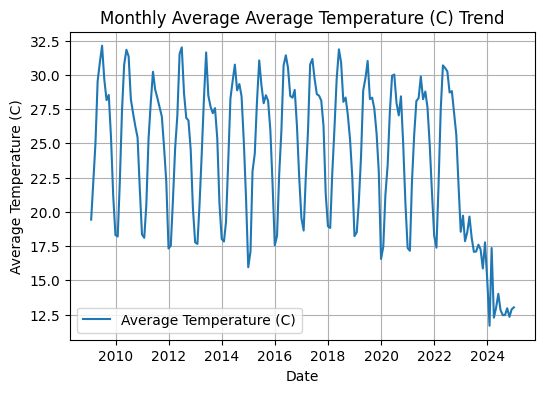

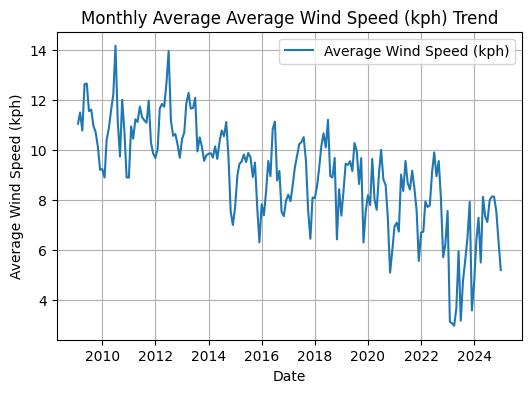

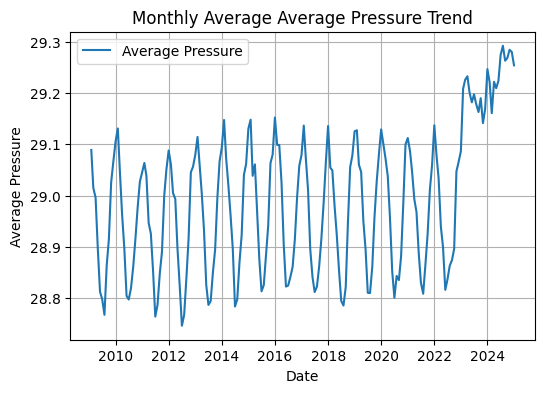

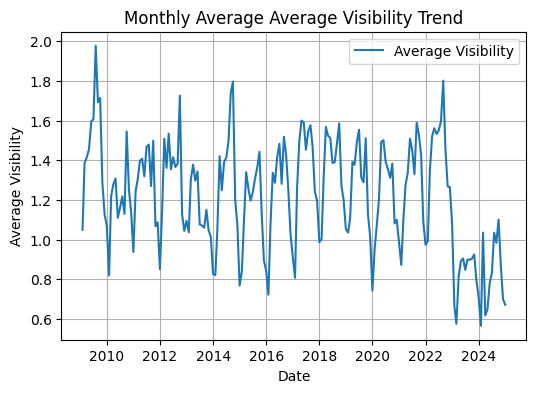

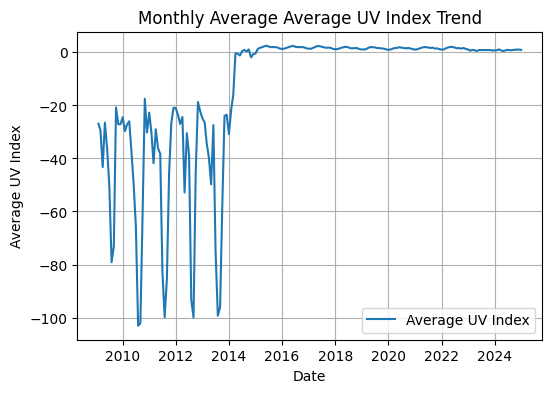

In [133]:
parameters_to_plot = ["Average Temperature (C)", "Average Wind Speed (kph)", "Average Pressure", "Average Visibility", "Average UV Index"]
weatherDf['Date'] = pd.to_datetime(weatherDf['Date'])

def plot_parameter(parameter):
    monthly_data = weatherDf.resample('M', on='Date').mean(numeric_only=True)
    
    plt.figure(figsize=(6, 4))
    plt.plot(monthly_data.index, monthly_data[parameter], label=parameter)
    plt.title(f'Monthly Average {parameter} Trend')
    plt.xlabel('Date')
    plt.ylabel(parameter)
    plt.legend()
    plt.grid(True)
    plt.show()

for param in parameters_to_plot:
    plot_parameter(param)

# symptoms_final_dataset.csv

In [134]:
symptomsDf = pd.read_csv('./Dataset/symptoms_final_dataset.csv')
symptomsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796 entries, 0 to 795
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   code                      796 non-null    int64 
 1   name                      796 non-null    object
 2   symptoms                  796 non-null    object
 3   description               796 non-null    object
 4   test_procedure            796 non-null    object
 5   medication_desc           796 non-null    object
 6   medications               796 non-null    object
 7   symptom_desc              796 non-null    object
 8   risk_years                796 non-null    object
 9   less_risk_years           796 non-null    object
 10  high_risk_race_ethnicity  796 non-null    object
 11  high_risk_gender          796 non-null    object
 12  less_risk_race_ethnicity  796 non-null    object
 13  less_risk_gender          796 non-null    object
dtypes: int64(1), object(13)
me

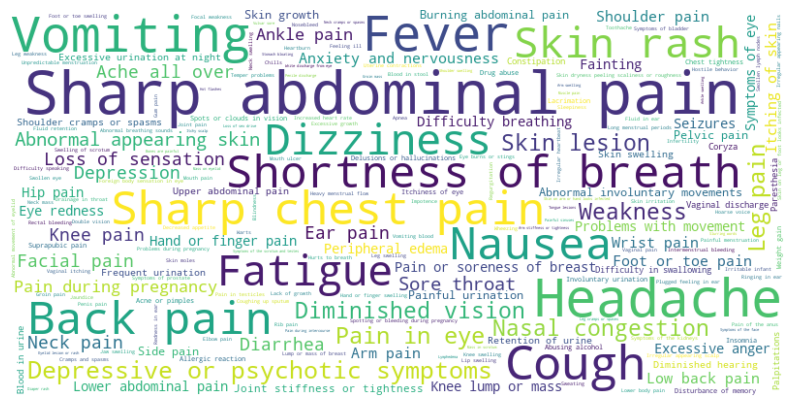

In [135]:
# Assuming 'symptoms' is the column name containing dictionary strings
# Replace 'symptoms' with your actual column name if it's different
symptoms_data = symptomsDf['symptoms'].apply(eval)

# Initialize an empty dictionary to hold symptom frequencies
symptom_freq = defaultdict(int)

# Iterate through each row in the dataset and update symptom frequencies
for row in symptoms_data:
    for symptom, frequency in row.items():
        symptom_freq[symptom] += int(frequency)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(symptom_freq)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
